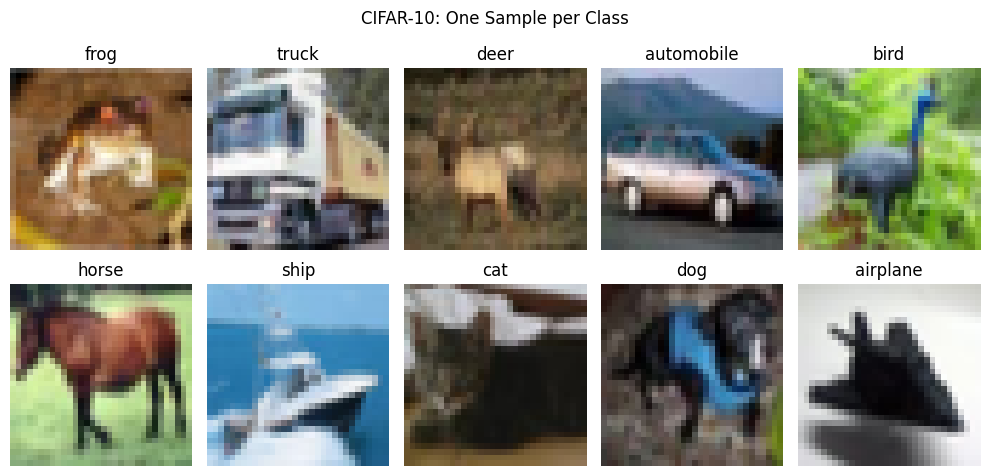

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.4253 - loss: 1.5798 - val_accuracy: 0.5058 - val_loss: 1.3544
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.5625 - loss: 1.2211 - val_accuracy: 0.6043 - val_loss: 1.1159
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.6245 - loss: 1.0697 - val_accuracy: 0.6351 - val_loss: 1.0312
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.6570 - loss: 0.9781 - val_accuracy: 0.6552 - val_loss: 0.9714
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.6845 - loss: 0.9024 - val_accuracy: 0.6816 - val_loss: 0.9164
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.7068 - loss: 0.8421 - val_accuracy: 0.6830 - val_loss: 0.9281
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.7230 - loss: 0.7919 - val_accuracy: 0.6712 - val_loss: 0.9317
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.7373 - loss: 0.7534 - 

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# 1. Load and normalize CIFAR-10 data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# 2. Show one image per class
plt.figure(figsize=(10, 5))
shown_classes = set()
i = 0
for idx in range(len(x_train)):
    label = y_train[idx]
    if label not in shown_classes:
        plt.subplot(2, 5, i + 1)
        plt.imshow(x_train[idx])
        plt.title(class_names[label])
        plt.axis('off')
        shown_classes.add(label)
        i += 1
    if len(shown_classes) == 10:
        break
plt.suptitle("CIFAR-10: One Sample per Class")
plt.tight_layout()
plt.show()

# 3. Define CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])

# 4. Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. Train
model.fit(x_train, y_train, epochs=10, batch_size=64,
          validation_data=(x_test, y_test))

# 6. Evaluate
loss, accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"\n Test Accuracy: {accuracy:.4f}")
